# **Proyecto de investigacion 1**

**Intencion del proyecto:**

El siguiente proyecto tiene la intención de evaluar la distribución y los factores que influyen en los salarios anuales brutos (sin incluir bonos ni acciones) de profesionales en el sector IT en Europa en el año 2020. Para ello, se plantean una serie de pasos y preguntas clave que permitirán explorar los datos desde una perspectiva descriptiva y estadística, identificando patrones, outliers y posibles relaciones entre variables relevantes como género, lenguaje de programación y edad.

**Finalidad del proyecto:**

La finalidad principal de este análisis es limpiar y estructurar los datos para extraer información significativa que permita comprender mejor las desigualdades salariales y los factores que podrían influir en los ingresos. Adicionalmente, se busca abordar preguntas relacionadas con las probabilidades condicionales y el impacto de características específicas en la distribución de los salarios, lo que contribuirá a generar una visión más clara de las tendencias en este ámbito profesional.

**Metodologia del proyecto:**

Mediante la implementación de visualizaciones como histogramas, diagramas de cajas y tablas de contingencia, este proyecto proporcionará un enfoque práctico para el análisis de datos, fomentando la interpretación de resultados a partir de cálculos estadísticos y gráficas comparativas. Finalmente, se investigará si existe alguna correlación significativa entre la edad y el salario, aportando insights sobre posibles tendencias demográficas en el sector.

In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer
import numpy as np
import matplotlib.pyplot as plt

**Paso 1** limpiar datos(eliminar columnas innecesarias, filas e imputar con la mediana).

In [ ]:
#Se lee el dataframe
df = pd.read_csv('/content/IT Salary Survey EU 2020.csv')
#Se extrae la columna que se trabajara
dfSal = df[{'Yearly brutto salary (without bonus and stocks) in EUR'}]
df

<ipython-input-2-b1755c55e0a0>:4: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  dfSal = df[{'Yearly brutto salary (without bonus and stocks) in EUR'}]


,Timestamp,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,...,Annual bonus+stocks one year ago. Only answer if staying in same country,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type,Have you lost your job due to the coronavirus outbreak?,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week","Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR"
0,24/11/2020 11:14:15,26.0,Male,Munich,Software Engineer,5,3,Senior,TypeScript,"Kotlin, Javascript / Typescript",...,10000,30,Full-time employee,Unlimited contract,English,51-100,Product,No,NaN,NaN
1,24/11/2020 11:14:16,26.0,Male,Berlin,Backend Developer,7,4,Senior,Ruby,NaN,...,5000,28,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN
2,24/11/2020 11:14:21,29.0,Male,Berlin,Software Engineer,12,6,Lead,Javascript / Typescript,"Javascript / Typescript, Docker",...,100000,30,Self-employed (freelancer),Temporary contract,English,101-1000,Product,Yes,NaN,NaN
3,24/11/2020 11:15:24,28.0,Male,Berlin,Frontend Developer,4,1,Junior,Javascript,NaN,...,NaN,24,Full-time employee,Unlimited contract,English,51-100,Startup,No,NaN,NaN
4,24/11/2020 11:15:46,37.0,Male,Berlin,Backend Developer,17,6,Senior,C# .NET,".NET, SQL, AWS, Docker",...,NaN,29,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1248,18/01/2021 15:05:50,31.0,Male,Berlin,Backend Developer,9,5,Senior,Java,"Python, Javascript / Typescript, Java / Scala,...",...,72000,26,Full-time employee,Unlimited contract,English,51-100,Product,Yes,NaN,NaN
1249,18/01/2021 17:46:02,33.0,Male,Berlin,Researcher/ Consumer Insights Analyst,10,1.5,Senior,consumer analysis,NaN,...,2500,unlimited,Full-time employee,Unlimited contract,English,1000+,Product,No,NaN,0
1250,18/01/2021 23:20:35,39.0,Male,Munich,IT Operations Manager,15,2,Lead,PHP,"Python, C/C++, Javascript / Typescript, Java /...",...,NaN,28,Full-time employee,Unlimited contract,English,101-1000,eCommerce,No,NaN,NaN
1251,19/01/2021 10:17:58,26.0,Male,Saarbrücken,Frontend Developer,7,7,Middle,JavaScript,"Javascript / Typescript, Docker, HTML, CSS; Ad...",...,36400,27,Full-time employee,Unlimited contract,German,101-1000,Product,No,NaN,0


In [ ]:
#Se imprime el dataframe que se trabajara para ver su contenido
dfSal

,Yearly brutto salary (without bonus and stocks) in EUR
0,80000.0
1,80000.0
2,120000.0
3,54000.0
4,62000.0
...,...
1248,70000.0
1249,60000.0
1250,110000.0
1251,38350.0


In [ ]:
#Se imprimen los datos del dataframe que se trabajara para poder manipular sus datos con exactitud
dfSal.describe()

,Yearly brutto salary (without bonus and stocks) in EUR
count,1.253000e+03
mean,8.027904e+07
std,2.825061e+09
min,1.000100e+04
25%,5.880000e+04
50%,7.000000e+04
75%,8.000000e+04
max,1.000000e+11


In [ ]:
imputer = SimpleImputer(strategy='median')
#para utilizar mediana o asi se pone imputer = SimpleImputer(strategy='median)
imputer.fit(dfSal)
#fit calcula la   estadistica para imputar (no hace la imputacion solo los calculos)
imputer.statistics_
#Trae la media de cada columna del df
imputer.transform(dfSal)
#Imputa con la estrategia donde haga falta
dfII = dfSal[(dfSal["Yearly brutto salary (without bonus and stocks) in EUR"] < 8.000000e+04)]

**Paso 2** Dibujar el histograma de distribución para el salario. Indicar Media y mediana.
¿La mediana y la media son similares? ¿por qué?


Son similares como se puede observar en la grafica propuesta, esto se debe a que los datos estan distribuidos de manera central. No es perfecta ya que la media y la mediana no son iguales pero al sacar la mayoria de datos outlider obtenemos este comportamiento. Ademas, como podemos ver en la grafica, esta posee una asimetria negativa, esto se puede decir porque la mayor concentracion de datos esta a la derecha mientras que los menores estan a la izquierda, esto indica claramente un sesgo en la parte izquierda.

In [ ]:
#Se define la media del dataframe al que le imputamos los datos
Md = dfII.mean()

#Se define la mediana del dataframe al que le imputamos los datos
Mn = dfII.median()

print(Md)
print(Mn)

Yearly brutto salary (without bonus and stocks) in EUR    60693.603037
dtype: float64
Yearly brutto salary (without bonus and stocks) in EUR    63000.0
dtype: float64


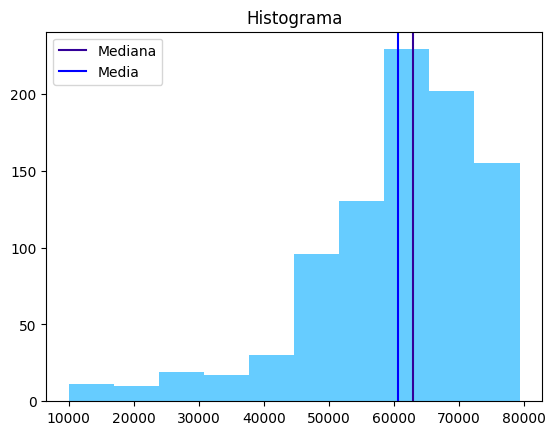

In [ ]:
#Se pinta el histograma de dfII y se pinta su respectiva mediana en magenta y la media en azul
SalarioHist = plt.hist(dfII, color='#66ccff')
plt.title('Histograma')
plt.axvline(63000.0, color= '#330099', label="Mediana")
plt.axvline(60693.603037, color= "blue", label="Media")
plt.legend()

**Paso 3** Dibujar diagrama de cajas para la distribución del salario. ¿Hay datos outliers? ¿cuales?

Como se aprecia en el diagrama de bigotes hay muchos datos atipicos a pesar de hacerle una gran limpieza en los anteriores puntos. A pesar de tener solo el 75% de los datos, aun se puede ver que la mayoría está por fuera de lo "normal". Estos valores outliders pueden ser la razon de tener el sesgo del que se hablo en el punto anterior.

{'whiskers': [<matplotlib.lines.Line2D at 0x7bc8e15da980>,
 'caps': [<matplotlib.lines.Line2D at 0x7bc8e15daec0>,
 'boxes': [<matplotlib.patches.PathPatch at 0x7bc8e15da5f0>],
 'medians': [<matplotlib.lines.Line2D at 0x7bc8e15db400>],
 'fliers': [<matplotlib.lines.Line2D at 0x7bc8e15db6a0>],
 'means': []}

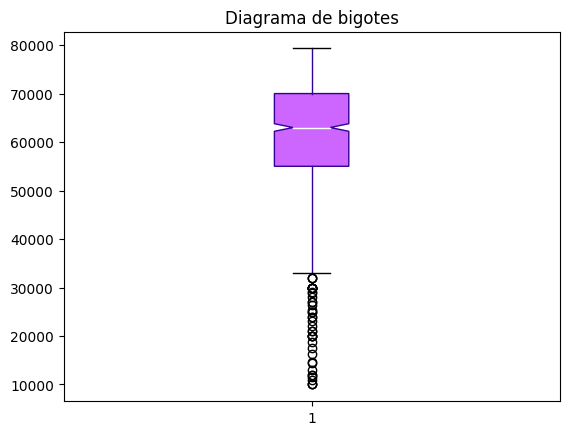

In [ ]:
#Se imprime el diagrama de bigotes
plt.title('Diagrama de bigotes')

plt.boxplot(dfII, patch_artist=True, notch=True ,boxprops=dict(facecolor='#cc66ff',color='#330099'),medianprops=dict(color='white'),whiskerprops=dict(color='#330099'))

**Paso 4** Agregar una columna que indique si alguien tiene un salario bruto mayor al tercer cuantil.

In [ ]:
#Se calcula el valor del tercer cuartil
q3 = np.percentile(dfII, 75, method="linear")
#Se crea la nueva columna mediante una pregunta con true si sobrepasa al tercer cuartil
dfII["Mayor tercer quartil"] = dfII["Yearly brutto salary (without bonus and stocks) in EUR"] > q3
dfII

<ipython-input-9-2a8ac08e0066>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfII["Mayor tercer quartil"] = dfII["Yearly brutto salary (without bonus and stocks) in EUR"] > q3


,Yearly brutto salary (without bonus and stocks) in EUR,Mayor tercer quartil
3,54000.0,False
4,62000.0,False
5,76000.0,True
6,57000.0,False
7,65000.0,False
...,...,...
1245,55000.0,False
1248,70000.0,False
1249,60000.0,False
1251,38350.0,False


**Paso 5** Dibujar tabla de contingencia y determinar:

In [ ]:
#Antes de continuar se añade la columna de genero y crean dos dataframes uno con los hombres y otro con las mujeres
dfII["Genero"] = df["Gender"]

dfII_H = dfII[dfII["Genero"] == "Male"]
dfII_M = dfII[dfII["Genero"] == "Female"]

pd.crosstab(index=dfII["Genero"], columns=dfII["Mayor tercer quartil"], margins=True)

<ipython-input-10-ba690defc458>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfII["Genero"] = df["Gender"]


Mayor tercer quartil,False,True,All
Genero,,,
Female,163,15,178
Male,533,182,715
All,696,197,893


¿Cuál es la probabilidad de tener un salario mayor al  tercer cuartil dado qué es hombre?

In [ ]:
Prob1_Pnt5 = 182/715
Prob1_Pnt5

0.2545454545454545

¿Cuál es la probabilidad de tener un salario mayor al  tercer cuartil dado qué es mujer?

In [ ]:
Prob2_Pnt5 = 15/178
Prob2_Pnt5

0.08426966292134831

¿Cuál es la probabilidad de  ser hombre dado que gana más del tercer cuartil?

In [ ]:
Prob3_Pnt5 = 182/197
Prob3_Pnt5

0.9238578680203046

¿Cuál es la probabilidad de  ser mujer dado que gana más del tercer cuartil?

In [ ]:
Prob4_Pnt5 = 15/197
Prob4_Pnt5

0.07614213197969544

**Paso 6** Dibujar tabla de contingencia y determinar:

In [ ]:
#Se crea un DataFrame nuevo llamado DF
DF = dfSal[(dfSal["Yearly brutto salary (without bonus and stocks) in EUR"] < 8.000000e+04)]
#Se calcula el valor del tercer cuartil
Q3 = np.percentile(DF, 75, method = "linear")
#Se agrega una columna que tenga los lenguajes de programación
DF['Lenguajes'] = df["Your main technology / programming language"].copy()
#Se crea la nueva columna mediante una pregunta con true si sobrepasa al tercer cuartil
DF["Mayor tercer quartil"] = DF["Yearly brutto salary (without bonus and stocks) in EUR"] > Q3
DF['Lenguaje = Python'] = df.apply(lambda row: row['Your main technology / programming language'] == "Python", axis=1)

DF

<ipython-input-15-d5abc3d60eee>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF['Lenguajes'] = df["Your main technology / programming language"].copy()
<ipython-input-15-d5abc3d60eee>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF["Mayor tercer quartil"] = DF["Yearly brutto salary (without bonus and stocks) in EUR"] > Q3
<ipython-input-15-d5abc3d60eee>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

,Yearly brutto salary (without bonus and stocks) in EUR,Lenguajes,Mayor tercer quartil,Lenguaje = Python
3,54000.0,Javascript,False,False
4,62000.0,C# .NET,False,False
5,76000.0,"AWS, GCP, Python,K8s",True,False
6,57000.0,Javascript,False,False
7,65000.0,Typescript,False,False
...,...,...,...,...
1245,55000.0,JavaScript,False,False
1248,70000.0,Java,False,False
1249,60000.0,consumer analysis,False,False
1251,38350.0,JavaScript,False,False


In [ ]:
pd.crosstab(index=DF["Lenguaje = Python"], columns = DF["Mayor tercer quartil"], margins = True)

Mayor tercer quartil,False,True,All
Lenguaje = Python,,,
False,606,181,787
True,94,18,112
All,700,199,899


¿Cuál es la probabilidad de tener un salario mayor al  tercer cuartil dado que programa en Python?

In [ ]:
Prob1_Pnt6 = 18/112
Prob1_Pnt6

0.16071428571428573

¿Cuál es la probabilidad de tener un salario mayor al  tercer cuartil dado que programa en otro lenguaje diferente de python?

In [ ]:
Prob2_Pnt6 = 181/787
Prob2_Pnt6

0.22998729351969505

**Paso 7** Dibujar el diagrama de cajas de los salarios vs el género. ¿Hay alguna diferencia en la distribución de los salarios recibidos por género? Justificar

Si se puede apreciar una diferencia existente entre las dos cajas, ya que como se puede pareciar, los hombres tienen los cuartiles mas elevados que lo de las mujeres. Lo que quiere decir que aunque la diferencia no es a gran escala, la concentracion de salarios elevados es mayor en el caso de los hombres.

<ipython-input-19-98c10aebbd09>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfII.drop(['Mayor tercer quartil'], axis=1, inplace=True)


Text(0, 0.5, 'Salario')

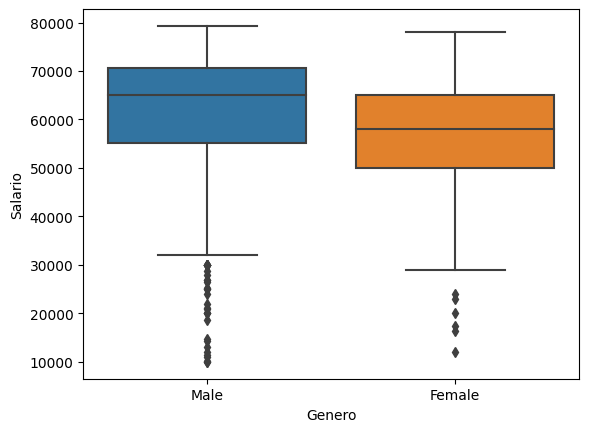

In [ ]:
import seaborn as sns

#Se hace dorp a la columna que no utilizaremos en este punto

dfII.drop(['Mayor tercer quartil'], axis=1, inplace=True)
dfII

#Se imprime el diagrama de bigotes

sns.boxplot(x=dfII["Genero"], y=dfII["Yearly brutto salary (without bonus and stocks) in EUR"])
plt.xlabel('Genero')
plt.ylabel('Salario')

Repetir paso anterior teniendo en cuenta sólo a los programadores senior.

En los hombres, el boxplot queda practicamente igual. El cambio reside dentro de la representacion de las mujeres al apreciar que el tercer cuartil tiene una mayor densidad al segundo indicando que hay una mayor concentracion de salarios grandes que en el segundo y tercer cuartil. Este cambio se debe a que hay menos mujeres senior que en los hombres, por eso es que en comparacion a la anterior grafica no cambian. Tambien hay que tener en cuenta que los senior tienden a tener salarios mas altos, es por esta, sumada a las anteriores razones, que el boxplot de las mujeres cambia.

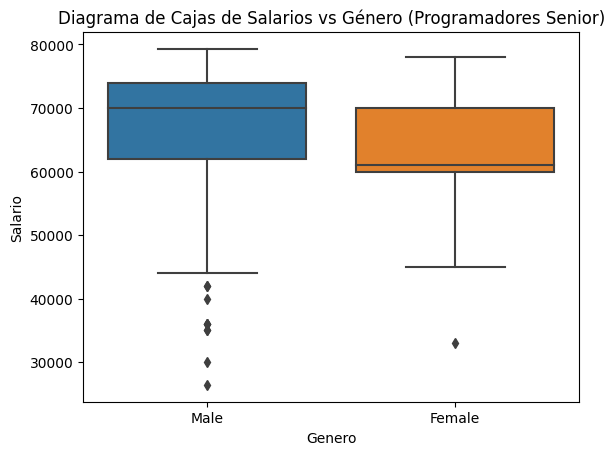

In [ ]:
#Se hace un filtro al dataframe inicial para tener solo los programadores especificados
dfSenior = df[df['Seniority level'] == "Senior"]
#Se hace el filtro que se hizo anteriormente para quitar los valores atipicos muy grandes
dfSenior = dfSenior[(dfSenior["Yearly brutto salary (without bonus and stocks) in EUR"] < 8.000000e+04)]
#Se definen los dos diagramas de bigotes para hacer la comparacion
sns.boxplot(x=dfSenior["Gender"], y=dfSenior["Yearly brutto salary (without bonus and stocks) in EUR"])
plt.xlabel('Genero')
plt.ylabel('Salario')
plt.title('Diagrama de Cajas de Salarios vs Género (Programadores Senior)')
plt.show()

**Paso 8** ¿Existe alguna correlación entre la edad y el salario? Justificar

El siguiente mapa de calor muestra que no hay correlacion entre la edad y el salario. Esto se puede ver por el valor que adquiere (0.23) y el color en la escala propuesta a la derecha. Por lo tanto se puede afirmar que el salario varia de otras cosas como por ejemplo el nivel de senior en vez de la edad.

<ipython-input-21-a720bed562fe>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfII.drop(['Genero'], axis=1, inplace=True)
<ipython-input-21-a720bed562fe>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfII['Edad'] = df['Age']


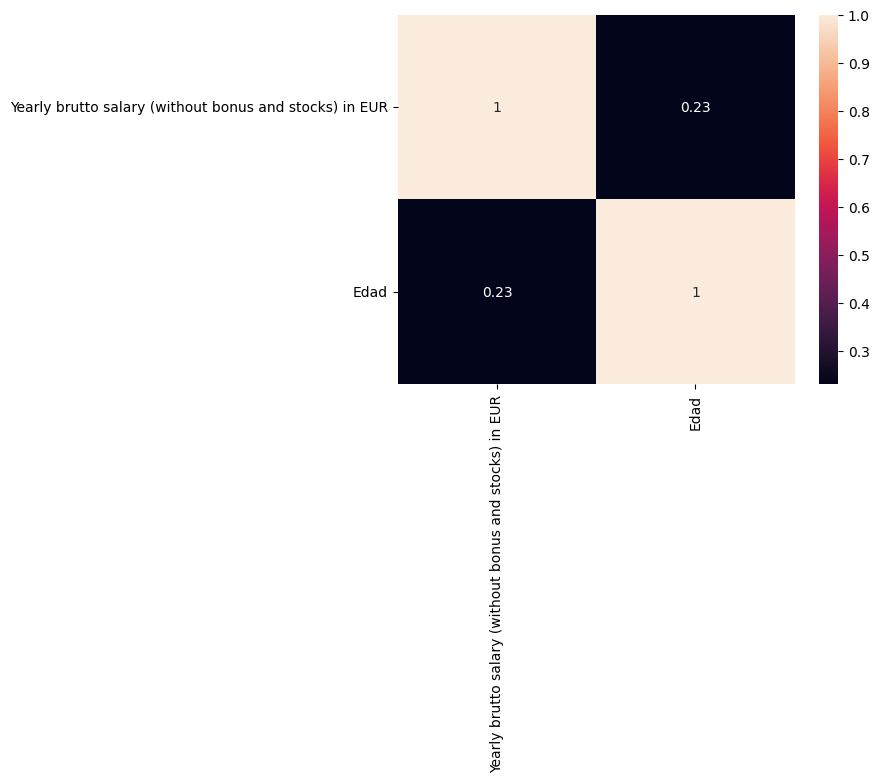

In [ ]:
#Eliminar la columna 'Genero' que esta en dfII para realizar las operaciones pertinentes
dfII.drop(['Genero'], axis=1, inplace=True)
#Se añade la columna edad para poder medirla con el salario
dfII['Edad'] = df['Age']
#Se define la correlacion entre el salario y la edad
mcorr = dfII.corr()
#Se pinta el mapa de calor con base a los calculos de la correlacion antes propuesta
sns.heatmap(mcorr,annot=True)
plt.savefig('attribute_correlations.png')

**Analisis Final:**

Aquí se analizarán los datos y gráficos presentados:

1. **Histograma de Distribución de Salarios:**
   El histograma muestra la distribución de los salarios en la muestra. Indica que la mayoría de los datos se concentran en la derecha. Esto sugiere una distribución sesgada, que pudo hacerse más notoría debido al filtro realizado en la base de datos.

2. **Media y Mediana:**
   La media y la mediana tienen valores similares. Esto podría indicar la presencia de algunos valores atípicos (outliers) que están afectando la media. La mediana es menos sensible a los outliers y representa el valor que se encuentra justo en el medio cuando los datos se ordenan. Si la media es mayor que la mediana, puede sugerir que hay valores más altos en la distribución que están inflando la media.

3. **Diagrama de Cajas (Boxplot) de Salarios:**
   El diagrama de cajas muestra la distribución de los salarios de manera más visual. La presencia de muchos outliers, incluso después de la limpieza de datos, puede indicar que hay algunos valores extremos que están afectando la representación general de la distribución. Esto podría explicar la diferencia entre la media y la mediana.4. **Diagrama de Cajas de Salarios vs Género:**
   La diferencia en las distribuciones de salarios entre géneros podría sugerir una disparidad en los ingresos. Si los cuartiles son más altos para hombres en comparación con mujeres, podría indicar que, en promedio, los hombres ganan más que las mujeres en la muestra. Se puede observar que esta diferencia es más notoria en el tercer cuartil, lo que podría estar relacionado con la presencia de menos mujeres en puestos senior.

5. **Correlación entre Edad y Salario:**
   El valor de correlación de 0.23 y el mapa de calor sugieren una correlación débil entre la edad y el salario. Esto significa que no hay una relación lineal fuerte entre estas dos variables en la muestra. Es posible que otros factores, como el nivel de senioridad, tengan un impacto mayor en la variación salarial.

En general, parece que la muestra de datos presenta algunas peculiaridades que están influyendo en la distribución salarial y en las relaciones entre variables. Los outliers y la posible falta de normalidad en la distribución podrían estar afectando las medidas estadísticas y las conclusiones que se pueden extraer de los análisis. Además, la disparidad de género en los salarios y la falta de correlación clara entre la edad y el salario podrían indicar áreas en las que podría ser necesario investigar más a fondo para comprender mejor los factores que influyen en los ingresos.